In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

### Basic level

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
# Create data path variable for loading data
data_path = '/Users/yangweichle/dat-sf-48/projects/02/data/'

In [4]:
# Read file into DataFrame
movies = pd.read_csv(data_path + 'imdb_1000.csv') # Comma-separated values file
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

Note: There are a number of ways to obtain this information.

In [5]:
# Return the number of rows and columns (dimensionality) of the DataFrame
movies.shape

(979, 6)

In [6]:
# Return the RangeIndex -- the row index ("i.e., row labels")
movies.index

RangeIndex(start=0, stop=979, step=1)

#### Check the data type of each column.

Note: There are a number of ways to obtain this information.

In [7]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist 
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [8]:
# Returns the data type of each column in the DataFrame
# Note: Columns with mixed types are stored with the ``object`` dtype
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

Note: There are a number of ways to obtain this information.

In [9]:
# Describe a single column -- recall that 'DataFrame.Column' refers to a Series
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [10]:
print('Movie Duration:')

# Return the mean of the values
print('Mean =', round(movies.duration.mean()), 'minutes')

Movie Duration:
Mean = 121 minutes


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [11]:
# Sort DataFrame by duration
# Including the first value (shortest duration) and appending the last value (longest duration)
movies.sort_values('duration').head(1).append(movies.sort_values('duration').tail(1))

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

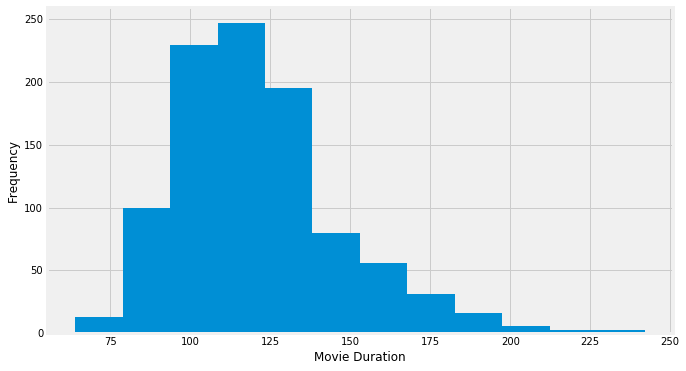

In [12]:
# Create histogram
# Note: bins: number of histogram bins to be used
#       figsize: a tuple (width, height) in inches
#movies.duration.hist(bins=12, figsize=(10, 6)); # same as below
movies.duration.plot(kind='hist', bins=12, figsize=(10, 6));
plt.xlabel('Movie Duration');
plt.ylabel('Frequency');

Note: The range of the movie durations is approximately 180 minutes (242-64).  I chose the "appropriate" number of bins to be 12 to show the distribution in 15 minute increments (180/12).

#### Use a box plot to display that same data.

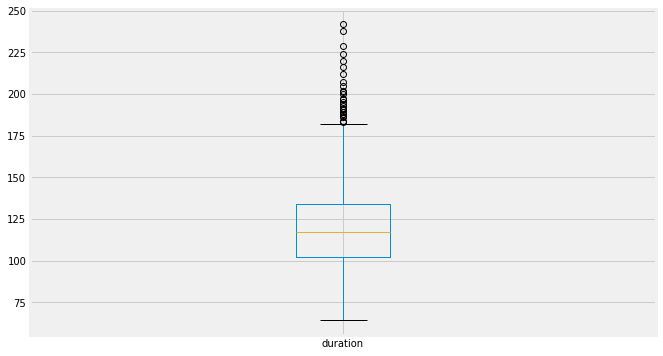

In [13]:
# Create box plot
# Note: figsize: a tuple (width, height) in inches
movies.duration.plot(kind='box', figsize=(10, 6));

### Intermediate level

#### Count how many movies have each of the content ratings.

In [14]:
# For each content rating, count the number of occurrences:

# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

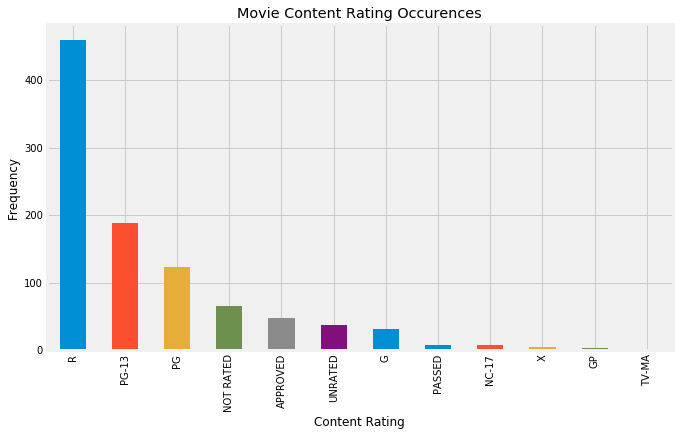

In [15]:
# Create a vertical bar plot by content rating
# Note: figsize: a tuple (width, height) in inches
#movies.content_rating.value_counts().plot.bar(figsize=(10, 6));
movies.content_rating.value_counts().plot(kind='bar', figsize=(10, 6));

plt.title('Movie Content Rating Occurences');
plt.xlabel('Content Rating');
plt.ylabel('Frequency');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [16]:
# Replace values in a column
movies.content_rating.replace('NOT RATED', 'UNRATED', inplace=True)
movies.content_rating.replace('APPROVED', 'UNRATED', inplace=True)
movies.content_rating.replace('PASSED', 'UNRATED', inplace=True)
movies.content_rating.replace('GP', 'UNRATED', inplace=True)

In [17]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [18]:
# Replace values in a column
movies.content_rating.replace('X', 'NC-17', inplace=True)
movies.content_rating.replace('TV-MA', 'NC-17', inplace=True)

In [19]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [20]:
# Detect missing values in a DataFrame
# Note: True if missing, False if not missing
#drinks.isna() # alias of isnull()
movies.isnull()

,star_rating,title,content_rating,genre,duration,actors_list
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [21]:
# Count the missing values in each column - sum() works because True is 1 and False is 0
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [22]:
# Detect missing values in a Series
# Note: True if missing, False if not missing
#movies.content_rating.isna() # alias of isnull()
null_content_rating = movies.content_rating.isnull()
movies[null_content_rating]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


Note: I looked up the movie rating on IBDb for these movies with missing values. I chose these as the "reasonable" values to fill in the missings.

In [23]:
# Set all of the null values in 'content_rating' to the value found in IMBb
movies.loc[187, 'content_rating'] = 'PG'
movies.loc[649, 'content_rating'] = 'PG'
movies.loc[936, 'content_rating'] = 'G'

In [24]:
# Count the missing values in each column - sum() works because True is 1 and False is 0
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [25]:
# Lambda function: apply an arbitrary function to each value of a Pandas column, storing the result in a new column
#movies.duration.apply(lambda duration: duration >= 120) # creating a view
movies['duration_gte_2hrs'] = movies.duration.apply(lambda duration: duration >= 120)

In [26]:
# Replace values in a column
movies.duration_gte_2hrs.replace(True, '>= 2 hours', inplace=True)
movies.duration_gte_2hrs.replace(False, '< 2 hours', inplace=True)

In [27]:
# For each movie group (>= 2 hours, < 2 hours), calculate the mean star rating:
movies.groupby('duration_gte_2hrs').duration.mean()

duration_gte_2hrs
< 2 hours     102.405714
>= 2 hours    142.458150
Name: duration, dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

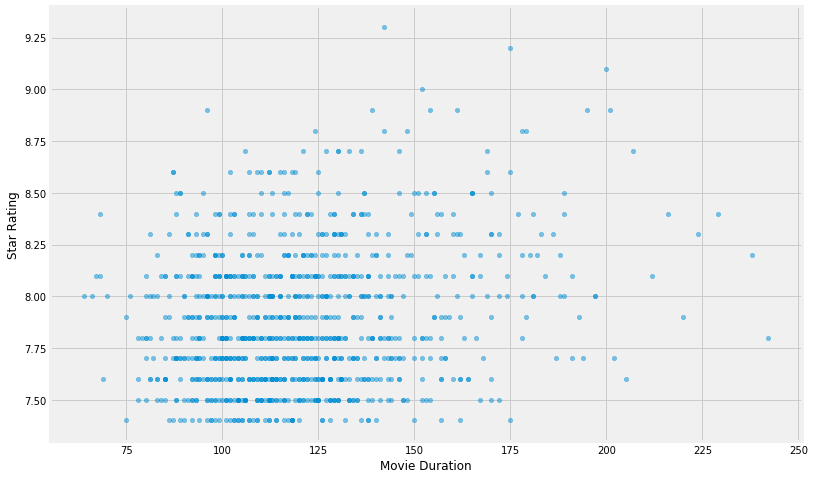

In [28]:
# Create scatter plot
# Note: alpha: blending value, between 0 (transparent) and 1 (opaque)
#       figsize: a tuple (width, height) in inches
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.5, figsize=(12, 8));

plt.xlabel('Movie Duration');
plt.ylabel('Star Rating');

#### Calculate the average duration for each genre.

In [29]:
# For each gengre, calculate the mean duration:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

### Advanced level

#### Visualize the relationship between content rating and duration.

In [30]:
# For each content rating, calculate the mean duration:
#movies.groupby('content_rating').duration.mean()
movies.groupby('content_rating').mean().drop('star_rating', axis=1)

,duration
content_rating,
G,112.818182
NC-17,116.250000
PG,115.600000
PG-13,127.195767
R,122.163043
UNRATED,116.475000


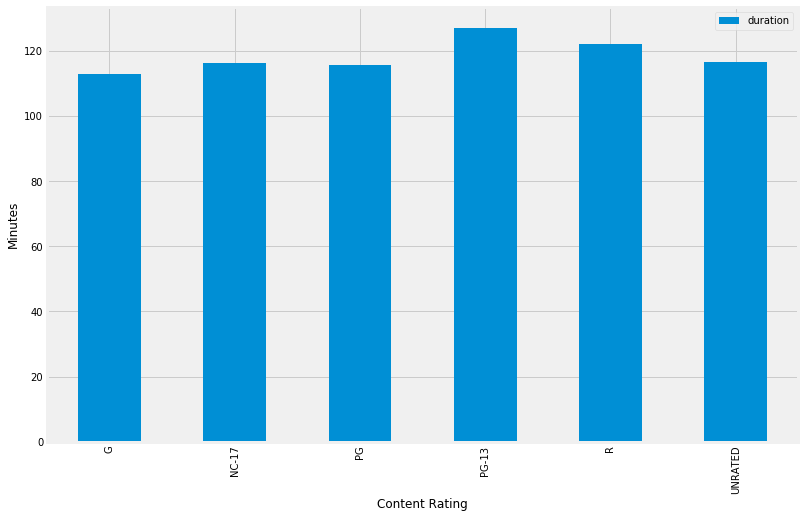

In [31]:
# Create vertical bar plots (with the star rating comparison removed!)
# Note: figsize: a tuple (width, height) in inches
movies.groupby('content_rating').mean().drop('star_rating', axis=1).plot(kind='bar', figsize=(12, 8));

plt.xlabel('Content Rating');
plt.ylabel('Minutes');

#### Determine the top rated movie (by star rating) for each genre.

In [32]:
# Find the unique values in the column
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [33]:
movies[movies.genre == 'Crime'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",>= 2 hours


In [34]:
movies[movies.genre == 'Action'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",>= 2 hours


In [35]:
movies[movies.genre == 'Drama'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",< 2 hours


In [36]:
movies[movies.genre == 'Western'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",>= 2 hours


In [37]:
movies[movies.genre == 'Adventure'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",>= 2 hours


In [38]:
movies[movies.genre == 'Biography'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",>= 2 hours


In [39]:
movies[movies.genre == 'Comedy'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G...",< 2 hours


In [40]:
movies[movies.genre == 'Animation'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy...",>= 2 hours


In [41]:
movies[movies.genre == 'Mystery'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C...",< 2 hours


In [42]:
movies[movies.genre == 'Horror'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi...",< 2 hours


In [43]:
movies[movies.genre == 'Film-Noir'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
105,8.3,The Third Man,UNRATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va...",< 2 hours


In [44]:
movies[movies.genre == 'Sci-Fi'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
145,8.2,Blade Runner,R,Sci-Fi,117,"[u'Harrison Ford', u'Rutger Hauer', u'Sean You...",< 2 hours


In [45]:
movies[movies.genre == 'History'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G...",< 2 hours


In [46]:
movies[movies.genre == 'Thriller'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
350,8.0,Shadow of a Doubt,UNRATED,Thriller,108,"[u'Teresa Wright', u'Joseph Cotten', u'Macdona...",< 2 hours


In [47]:
movies[movies.genre == 'Family'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
468,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C...",< 2 hours


In [48]:
movies[movies.genre == 'Fantasy'].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ...",< 2 hours


Note: I really struggled with using a for loop below to print out the results cleanly. 

In [49]:
movies2 = movies[['title', 'genre', 'star_rating']]
movies2.head()

,title,genre,star_rating
0,The Shawshank Redemption,Crime,9.3
1,The Godfather,Crime,9.2
2,The Godfather: Part II,Crime,9.1
3,The Dark Knight,Action,9.0
4,Pulp Fiction,Crime,8.9


In [50]:
genre_list = ['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
               'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
               'History', 'Thriller', 'Family', 'Fantasy']

top_movie_genre = []

for genre_type in genre_list:
    tmg = movies2[movies2.genre == genre_type].sort_values('star_rating', ascending=False).head(1)
    top_movie_genre.append(tmg)
    
top_movie_genre

[                      title  genre  star_rating
 0  The Shawshank Redemption  Crime          9.3,
              title   genre  star_rating
 3  The Dark Knight  Action          9.0,
           title  genre  star_rating
 5  12 Angry Men  Drama          8.9,
                             title    genre  star_rating
 6  The Good, the Bad and the Ugly  Western          8.9,
                                            title      genre  star_rating
 7  The Lord of the Rings: The Return of the King  Adventure          8.9,
               title      genre  star_rating
 8  Schindler's List  Biography          8.9,
                 title   genre  star_rating
 25  Life Is Beautiful  Comedy          8.6,
             title      genre  star_rating
 30  Spirited Away  Animation          8.6,
           title    genre  star_rating
 38  Rear Window  Mystery          8.6,
      title   genre  star_rating
 39  Psycho  Horror          8.6,
              title      genre  star_rating
 105  The Third Man  F

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [51]:
# Indicate duplicate rows for a DataFrame
# Note: True if a row is identical to a previous row
movies.duplicated()

# Count of duplicate rows
movies.duplicated().sum()

0

Note: There are no duplicate rows.  Checking below for duplicates with the same title.

In [52]:
# Indicate duplicate values for a single column
movies.title.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
949    False
950    False
951    False
952    False
953    False
954    False
955    False
956    False
957    False
958    False
959    False
960    False
961    False
962    False
963    False
964    False
965    False
966    False
967    False
968    False
969    False
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
Name: title, Length: 979, dtype: bool

In [53]:
# Count of duplicate movie titles
movies.title.duplicated().sum()

4

In [54]:
# Filter to only show duplicate rows
movies[movies.title.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",>= 2 hours
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",>= 2 hours
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",>= 2 hours
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",>= 2 hours


In [55]:
movies[movies.title.isin(['The Girl with the Dragon Tattoo', 'Dracula', 'Les Miserables', 'True Grit'])].sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list,duration_gte_2hrs
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",< 2 hours
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",>= 2 hours
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",>= 2 hours
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",>= 2 hours
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",>= 2 hours
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",>= 2 hours
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",< 2 hours
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",>= 2 hours


Note: These titles are duplicates.  However, the list contains remakes of movies so there is not a problem.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies.

In [58]:
# For each genre, calculate the mean star rating:
#movies.groupby('genre').star_rating.mean()
#movies.groupby('genre').mean().drop('duration', axis=1)
movies.groupby('genre').agg(['count', 'mean']).drop('duration', axis=1)

star_rating          
                count      mean
genre                          
Action            136  7.884559
Adventure          75  7.933333
Animation          62  7.914516
Biography          77  7.862338
Comedy            156  7.822436
Crime             124  7.916935
Drama             278  7.902518
Family              2  7.850000
Fantasy             1  7.700000
Film-Noir           3  8.033333
History             1  8.000000
Horror             29  7.806897
Mystery            16  7.975000
Sci-Fi              5  7.920000
Thriller            5  7.680000
Western             9  8.255556

#### Option 1: manually create a list of relevant genres, then filter using that list

In [130]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [131]:
movies_genre10 = movies[movies.genre.isin(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery'])].sort_values('title')

In [132]:
movies_genre10.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Name: genre, dtype: int64

In [133]:
# For each genre, calculate the mean star rating:
#movies_genre10.groupby('genre').star_rating.mean()
#movies_genre10.groupby('genre').mean().drop('duration', axis=1)
#movies_genre10.groupby('genre').agg(['count', 'mean']).drop('duration', axis=1))
movies_genre10.groupby('genre').star_rating.agg(['count', 'mean']).sort_values('count', ascending = False)

,count,mean
genre,,
Drama,278,7.902518
Comedy,156,7.822436
Action,136,7.884559
Crime,124,7.916935
Biography,77,7.862338
Adventure,75,7.933333
Animation,62,7.914516
Horror,29,7.806897
Mystery,16,7.975000


Note: I was not able to successfully complete Options 2-4.

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [134]:
counts = movies.genre.value_counts().tolist()
counts

[278, 156, 136, 124, 77, 75, 62, 29, 16, 9, 5, 5, 3, 2, 1, 1]

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [135]:
# For each genre, calculate the mean star rating:
#movies.groupby('genre').star_rating.mean()
movies.groupby('genre').mean().drop('duration', axis=1)

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000


#### Option 4: aggregate by count and mean, then filter using the count

In [136]:
# For each genre, calculate the mean star rating:
grouped = movies.groupby('genre').star_rating.agg(['count', 'mean'])
grouped

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Family,2,7.850000
Fantasy,1,7.700000


### Bonus

#### Figure out something "interesting" using the actors data!